# Rocky Wu - jywu3

Code Source that I looked at and learned from: [link](https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek07%2Fprep_notebook_week07_part1.ipynb)

As usual, import the packages we want

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import bqplot
import matplotlib.colors as mpl_colors
import seaborn as sns

---

# Final Project - Code Section

## Explore the Dataset:

The name of the dataset: Yellow Taxi trip data 2021-01 in NYC

We can obtain the dataset at the TLC official site. https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

The link towards the dataset: https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv

Preferably, download the dataset first as the dataset is fairly large, 126MB.

However, as I had exceeded the Git LFS in my plan, I swapped the local import into url.

No identification of the license, so I am assuming we can play around with it. I do find an user guide of the dataset, but not much was mentioned on what we can do with the data. Link to the user guide: https://www1.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf

The dictionary of the dataset:https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

---

### Columns Explained:

The following columns are the columns that I will be used in the final project part 3. The explanation for rest of the columns can be found inside the dictionary of the dataset noted above. 

tpep_pickup_datetime - The date and time when the meter was engaged.

Passenger_count - The number of passengers in the vehicle. This is a driver-entered value.

Trip_distance - The elapsed trip distance in miles reported by the taximeter.

Total_amount - The total amount charged to passengers. Does not include cash tips.

---

### Take a look of the dataset

There was a warning indicating the dtype conflicts in some of the columns in the dataset. Will deal with the warning in the later stage. Escaping the warning now by setting low_memory = False

We will first downsample the dataset, else mybinder could not handle the dataset. I am taking the number of samples to be 0.1% of the original dataset else mybinder would crash. Feel free to adjust the sample to see different results.

In [2]:
data_2021 = pd.read_csv("https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv", 
                   low_memory=False)

In [3]:
data_2021.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2021-01-01 00:30:10   2021-01-01 00:36:12              1.0   
1       1.0  2021-01-01 00:51:20   2021-01-01 00:52:19              1.0   
2       1.0  2021-01-01 00:43:30   2021-01-01 01:11:06              1.0   
3       1.0  2021-01-01 00:15:48   2021-01-01 00:31:01              0.0   
4       2.0  2021-01-01 00:31:49   2021-01-01 00:48:21              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.10         1.0                  N           142            43   
1           0.20         1.0                  N           238           151   
2          14.70         1.0                  N           132           165   
3          10.60         1.0                  N           138           132   
4           4.94         1.0                  N            68            33   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           2.0          8.0    3.0      0.5        0.00           0.0   
1           2.0          3.0    0.5      0.5        0.00           0.0   
2           1.0         42.0    0.5      0.5        8.65           0.0   
3           1.0         29.0    0.5      0.5        6.05           0.0   
4           1.0         16.5    0.5      0.5        4.06           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3         11.80                   2.5  
1                    0.3          4.30                   0.0  
2                    0.3         51.95                   0.0  
3                    0.3         36.35                   0.0  
4                    0.3         24.36                   2.5

In total 1369765 rows after downsampling inside the dataset, indeed a large one.

In [4]:
len(data_2021)

1369765

How many columns:

In [5]:
len(data_2021.columns)

18

Take a look on the columns that we cared and their datatypes:

Create a set to inspect: (better performance in runtime)

In [6]:
columnsCared = {'tpep_pickup_datetime', 'passenger_count',
               'trip_distance','total_amount'}

In [7]:
for c in columnsCared:
    print(c, data_2021[c].dtype)

tpep_pickup_datetime object
passenger_count float64
total_amount float64
trip_distance float64


---

### Explore the values inside each column

From the above, we can tell that the datetime column need some cleaning. We would create a new column called "pickup_date" to store the values that transferred the values inside "tpep_pickup_datetime" into date objects.

In [8]:
data_2021['pickup_date'] = pd.to_datetime(data_2021['tpep_pickup_datetime']).dt.date
data_2021['pickup_date'] = pd.to_datetime(data_2021['pickup_date'])
data_2021['pickup_date'].head()

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: pickup_date, dtype: datetime64[ns]

Good, now we have changed the datatype of the dates into the correct type, lets see if there are any nan or strange entries in the column

In [9]:
pd.to_datetime(data_2021['pickup_date']).dt.date.unique()

array([datetime.date(2021, 1, 1), datetime.date(2020, 12, 31),
       datetime.date(2021, 1, 2), datetime.date(2021, 1, 4),
       datetime.date(2021, 1, 3), datetime.date(2021, 1, 5),
       datetime.date(2021, 1, 6), datetime.date(2021, 1, 7),
       datetime.date(2021, 1, 8), datetime.date(2021, 1, 9),
       datetime.date(2021, 1, 10), datetime.date(2021, 1, 11),
       datetime.date(2021, 2, 1), datetime.date(2021, 2, 22),
       datetime.date(2021, 1, 12), datetime.date(2021, 1, 13),
       datetime.date(2021, 1, 14), datetime.date(2009, 1, 1),
       datetime.date(2021, 1, 15), datetime.date(2021, 1, 16),
       datetime.date(2021, 1, 17), datetime.date(2021, 1, 18),
       datetime.date(2021, 1, 19), datetime.date(2021, 1, 20),
       datetime.date(2021, 1, 21), datetime.date(2021, 1, 22),
       datetime.date(2021, 1, 23), datetime.date(2021, 1, 24),
       datetime.date(2021, 1, 25), datetime.date(2021, 1, 26),
       datetime.date(2008, 12, 31), datetime.date(2021, 1, 27),
 

---

### Data Cleaning

Notice that we have three errorous data in the dataset, some indicated 2008/12/31, some indicated 2020/12/31 and the rest indicating 2009/12/31. We should remove these entries.

In [10]:
data_2021[(data_2021['pickup_date'] <= "2020-12-31") 
     | (data_2021['pickup_date'] > "2021-01-31")].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
455       2.0  2020-12-31 23:59:06   2021-01-01 00:02:51              2.0   
530       2.0  2020-12-31 21:40:20   2020-12-31 22:16:09              1.0   
546       2.0  2020-12-31 23:57:17   2021-01-01 00:17:40              1.0   
637       2.0  2020-12-31 18:41:27   2021-01-01 17:52:03              1.0   
902       2.0  2020-12-31 23:55:40   2021-01-01 00:24:51              1.0   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
455           0.74         1.0                  N           237           236   
530          17.96         1.0                  N           249           213   
546           3.80         1.0                  N           163           166   
637           2.61         1.0                  N            90           229   
902           6.45         1.0                  N           231            17   

     payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
455           1.0          5.0    0.5      0.5        1.76           0.0   
530           2.0         49.5    0.5      0.5        0.00           0.0   
546           1.0         16.0    0.5      0.5        3.96           0.0   
637           1.0         10.0    0.5      0.5        2.76           0.0   
902           2.0         24.5    0.5      0.5        0.00           0.0   

     improvement_surcharge  total_amount  congestion_surcharge pickup_date  
455                    0.3         10.56                   2.5  2020-12-31  
530                    0.3         53.30                   2.5  2020-12-31  
546                    0.3         23.76                   2.5  2020-12-31  
637                    0.3         16.56                   2.5  2020-12-31  
902                    0.3         28.30                   2.5  2020-12-31

Create a dropIndex list to remove all the error data

In [11]:
dropIndex = list(data_2021[(data_2021['pickup_date'] <= "2020-12-31") 
     | (data_2021['pickup_date'] > "2021-01-31")].index)

Take a look inside the dropIndex

In [12]:
dropIndex[:5], len(dropIndex)

([455, 530, 546, 637, 902], 24)

Drop the error data

In [13]:
data_2021.drop([i for i in dropIndex], inplace=True)

Now the data should look good

In [14]:
pd.to_datetime(data_2021['tpep_pickup_datetime']).dt.date.unique()

array([datetime.date(2021, 1, 1), datetime.date(2021, 1, 2),
       datetime.date(2021, 1, 4), datetime.date(2021, 1, 3),
       datetime.date(2021, 1, 5), datetime.date(2021, 1, 6),
       datetime.date(2021, 1, 7), datetime.date(2021, 1, 8),
       datetime.date(2021, 1, 9), datetime.date(2021, 1, 10),
       datetime.date(2021, 1, 11), datetime.date(2021, 1, 12),
       datetime.date(2021, 1, 13), datetime.date(2021, 1, 14),
       datetime.date(2021, 1, 15), datetime.date(2021, 1, 16),
       datetime.date(2021, 1, 17), datetime.date(2021, 1, 18),
       datetime.date(2021, 1, 19), datetime.date(2021, 1, 20),
       datetime.date(2021, 1, 21), datetime.date(2021, 1, 22),
       datetime.date(2021, 1, 23), datetime.date(2021, 1, 24),
       datetime.date(2021, 1, 25), datetime.date(2021, 1, 26),
       datetime.date(2021, 1, 27), datetime.date(2021, 1, 28),
       datetime.date(2021, 1, 29), datetime.date(2021, 1, 30),
       datetime.date(2021, 1, 31)], dtype=object)

Create a chart to show the trip count at NYC in January, 2021

In [15]:
fig = plt.figure(figsize=(15,10))

record_2021_df = data_2021.value_counts('pickup_date').sort_index()
bar_chart = plt.bar(x =record_2021_df.index, 
                    height = record_2021_df.values)
bar_chart.colors = ["blue"]

plt.xlabel("Date")
plt.ylabel("Trip Count")
plt.title("Trip Count in Jan. 2021")

plt.show()

In [16]:
record_2021_df.min(), record_2021_df.max()

(24827, 56444)

Thus, we should take the log for the values, as the range is pretty big. To make sure that data could show the graph better without losing the scale, taking log is my option. 

In [17]:
record_2021_df = np.log10(record_2021_df)
record_2021_df.head()

pickup_date
2021-01-01    4.394924
2021-01-02    4.535408
2021-01-03    4.420698
2021-01-04    4.648799
2021-01-05    4.670951
dtype: float64

Create a new data frame that only contains the day and log count

In [18]:
data_grouped = pd.DataFrame()

data_grouped['date'] = record_2021_df.index.day
# data_grouped['record_2019'] = record_2019_df.values
# data_grouped['record_2020'] = record_2020_df.values
data_grouped['record_2021'] = record_2021_df.values

data_grouped.head()

date  record_2021
0     1     4.394924
1     2     4.535408
2     3     4.420698
3     4     4.648799
4     5     4.670951

Create a average recod count variable for each year

The number 13587 was from the [source](https://medium.com/@NYCTLC/factbook-deep-dive-1-e4dd57075945) at here which tells us the total amount to taxi drivers in NYC. (There were 13,587 licensed yellow cabs, compared to 35,000 licensed High Volume vehicles, at that time.)

In [19]:
avg_record_2021_df = data_2021.value_counts('pickup_date').sort_index() / 13587
avg_record_2021_df.head()

pickup_date
2021-01-01    1.827261
2021-01-02    2.525134
2021-01-03    1.938986
2021-01-04    3.278502
2021-01-05    3.450063
dtype: float64

In [20]:
avg_record_2021 = avg_record_2021_df.sum() / len(avg_record_2021_df)
avg_record_2021

3.252019838697806

Create a total amount variable for each year

In [21]:
total_amount_2021 = data_2021.groupby('pickup_date')['total_amount'].sum()
total_amount_2021 = np.log10(total_amount_2021)
total_amount_2021.head()

pickup_date
2021-01-01    5.669397
2021-01-02    5.813116
2021-01-03    5.731452
2021-01-04    5.916763
2021-01-05    5.919328
Name: total_amount, dtype: float64

Create a passenger count variable for the year

However, we would have to remove some faulty data inside the passenger count column, as we will find some NaN values and 0 values. These data entries need to be removed.

Check unique values to find the possible errors

In [22]:
data_2021['passenger_count'].unique()

array([ 1.,  0.,  2.,  3.,  5.,  4.,  6.,  8.,  7., nan])

Show all the 0 passenger count values inside the dataset

In [23]:
data_2021[data_2021['passenger_count'] == 0].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3         1.0  2021-01-01 00:15:48   2021-01-01 00:31:01              0.0   
22        1.0  2021-01-01 00:16:27   2021-01-01 00:25:36              0.0   
23        1.0  2021-01-01 00:37:59   2021-01-01 01:01:37              0.0   
107       1.0  2021-01-01 00:27:44   2021-01-01 00:32:04              0.0   
127       1.0  2021-01-01 00:45:19   2021-01-01 00:46:51              0.0   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
3             10.6         1.0                  N           138           132   
22             2.2         1.0                  N           249           137   
23             3.6         1.0                  N           107           163   
107            1.2         1.0                  N           137           229   
127            0.5         1.0                  N           229           140   

     payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
3             1.0         29.0    0.5      0.5        6.05           0.0   
22            3.0          9.0    3.0      0.5        0.00           0.0   
23            1.0         17.0    3.0      0.5       10.00           0.0   
107           1.0          5.5    3.0      0.5        1.86           0.0   
127           2.0          4.0    3.0      0.5        0.00           0.0   

     improvement_surcharge  total_amount  congestion_surcharge pickup_date  
3                      0.3         36.35                   0.0  2021-01-01  
22                     0.3         12.80                   2.5  2021-01-01  
23                     0.3         30.80                   2.5  2021-01-01  
107                    0.3         11.16                   2.5  2021-01-01  
127                    0.3          7.80                   2.5  2021-01-01

Make a dropIndex list to drop all the error data

In [24]:
dropIndex = list(data_2021[data_2021['passenger_count'] == 0].index)
dropIndex[:5], len(dropIndex)

([3, 22, 23, 107, 127], 26726)

Drop the indices

In [25]:
data_2021.drop([i for i in dropIndex], inplace=True)

Drop the NaN values

In [26]:
data_2021 = data_2021[~pd.isnull(data_2021['passenger_count'])]

Check the unique data inside to make sure we cleaned everything

In [27]:
data_2021['passenger_count'].unique()

array([1., 2., 3., 5., 4., 6., 8., 7.])

In [28]:
pass_count_2021 = data_2021.groupby('pickup_date')['passenger_count'].sum()
pass_count_2021

pickup_date
2021-01-01    35080.0
2021-01-02    48178.0
2021-01-03    35518.0
2021-01-04    57239.0
2021-01-05    60439.0
2021-01-06    63460.0
2021-01-07    64816.0
2021-01-08    65307.0
2021-01-09    54651.0
2021-01-10    41012.0
2021-01-11    59907.0
2021-01-12    63871.0
2021-01-13    65570.0
2021-01-14    68554.0
2021-01-15    68431.0
2021-01-16    53363.0
2021-01-17    43792.0
2021-01-18    48353.0
2021-01-19    66008.0
2021-01-20    64390.0
2021-01-21    69043.0
2021-01-22    70569.0
2021-01-23    58001.0
2021-01-24    42477.0
2021-01-25    60361.0
2021-01-26    60925.0
2021-01-27    66532.0
2021-01-28    72893.0
2021-01-29    70458.0
2021-01-30    53511.0
2021-01-31    41869.0
Name: passenger_count, dtype: float64

Create helper function for the dashboard

In [29]:
myIndividuaLSelectedLabel = ipywidgets.Label()

In [30]:
ntrip_distance = 20
ntotal_payment = 20

In [31]:
Itrip_bins = np.linspace(1.26125, 48.80875, ntrip_distance+1)
Ipay_bins = np.linspace(6.9375, 259.1625, ntotal_payment+1)

In [32]:
Ihist2d, Itrip_edges, Ipay_edges = np.histogram2d(data_2021['trip_distance'],
                                                 data_2021['total_amount'],
                                                 weights=data_2021['passenger_count'],
                                                 bins = [Itrip_bins, Ipay_bins])

In [33]:
Itrip_centers = (Itrip_edges[:-1] + Itrip_edges[1:]) / 2
Ipay_centers = (Ipay_edges[:-1] + Ipay_edges[1:]) / 2

In [34]:
Itripmin = Itrip_centers.min()
Itripmax = Itrip_centers.max()
Ipaymin = Ipay_centers.min()
Ipaymax = Ipay_centers.max()
Itripmin, Itripmax, Ipaymin, Ipaymax

(2.4499375, 47.6200625, 13.243125000000001, 252.85687500000003)

In [35]:
def individual_generate_histogram_from_trip_pay(data, ntrip=20, npay=20,
                                               tripmin=Itripmin, tripmax=Itripmax,
                                               paymin=Ipaymin,paymax=Ipaymax,
                                                takeLog=True):
    trip_bins = np.linspace(tripmin, tripmax, ntrip+1)
    pay_bins = np.linspace(paymin, paymax, npay+1)
    hist2d, trip_edges, pay_edges = np.histogram2d(data['trip_distance'],
                                                  data['total_amount'],
                                                  weights=data['passenger_count'],
                                                  bins = [trip_bins, pay_bins])
    hist2d = hist2d.T
    if takeLog:
        hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
        # then take log
        hist2d = np.log10(hist2d)
        trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
        pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2
    return hist2d, trip_centers, pay_centers, trip_edges, pay_edges

In [36]:
Ihist2d, Itrip_centers, Ipay_centers, Itrip_edges, Ipay_edges = individual_generate_histogram_from_trip_pay(data_2021)

In [37]:
# Scale
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min=np.nanmin(Ihist2d),
                          max=np.nanmax(Ihist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Axis
c_ax = bqplot.ColorAxis(scale = col_sc,
                       orientation='vertical',
                       side='right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, label='Total Payment',
                  orientation='vertical', label_offset="45px")


# Marks
Iheat_map = bqplot.GridHeatMap(color = Ihist2d,
                              row = Ipay_centers,
                              column = Itrip_centers,
                              scales = {'color':col_sc,
                                       'row': y_sc, 
                                       'column':x_sc},
                              interactions = {'click':'select'},
                              anchor_style = {'fill':'blue'},
                              selected_style = {'opacity':1.00},
                              unselected_style = {'opacity':1.00})

In [38]:
# Scale
x_scl = bqplot.DateScale()
y_scl = bqplot.LogScale()

# Axis
ax_xcl = bqplot.Axis(label='Date', scale = x_scl)
ax_ycl = bqplot.Axis(label = 'Passenger Count', scale = y_scl, 
                    orientation = 'vertical', side = 'left')

# Marks
i,j = 19, 0
Itrips = [Itrip_edges[j], Itrip_edges[j+1]]
Ipays = [Ipay_edges[i], Ipay_edges[i+1]]

# region mask
region_mask = ((data_2021['total_amount'] >= Ipays[0]) & (data_2021['total_amount']<=Ipays[1]) &\
                    (data_2021['trip_distance'] >= Itrips[0]) & (data_2021['trip_distance']<=Itrips[1]))

# Fig
Ipass_scatt = bqplot.Scatter(x=data_2021['pickup_date'][region_mask],
                            y=data_2021['passenger_count'][region_mask],
                            scales = {'x':x_scl, 'y':y_scl})

In [39]:
def get_individual_data_value(change):
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = Ihist2d[i, j]
        myIndividuaLSelectedLabel.value = "Passenger Count in Log = " + str(v)
        Itrips = [Itrip_edges[j], Itrip_edges[j+1]]
        Ipays = [Ipay_edges[i], Ipay_edges[i+1]]
        region_mask = ((data_2021['total_amount'] >= Ipays[0]) & (data_2021['total_amount']<=Ipays[1]) &\
                    (data_2021['trip_distance'] >= Itrips[0]) & (data_2021['trip_distance']<=Itrips[1]))
        Ipass_scatt.x = data_2021['pickup_date'][region_mask]
        Ipass_scatt.y = data_2021['passenger_count'][region_mask]
        
Iheat_map.observe(get_individual_data_value, 'selected')

In [40]:
fig_Iheatmap = bqplot.Figure(marks = [Iheat_map], axes = [c_ax, y_ax, x_ax])
fig_Ipass = bqplot.Figure(marks = [Ipass_scatt], axes = [ax_xcl, ax_ycl])

In [41]:
fig_Iheatmap.layout.min_width='500px'
fig_Ipass.layout.min_width='500px'

myDashboard = ipywidgets.VBox([myIndividuaLSelectedLabel, ipywidgets.VBox([fig_Iheatmap,fig_Ipass])])
# myDashboard

# Final Project Part 3 - Write Up

The code for the write-up were either taken from the web or taken from this file. Citations will be included if I had used something from the web.

## Data Visualization - TLC Yellow Taxi Simple Investigation

### *TLC DATA AT JANUARY 2021 DEEP DIVE* 
*This post will take a closer look at the yellow taxi industry in New York City by examining the total trips and total payments and the passenger counts in January 2021* 

As we know, since the late 2019, when the COVID-2019 breakout, we had suffered a gigantic impact on travelling, both domestic and international. As you can see below, a major impact would be the count on recorded data for the January at 2019, 2020, and 2021. In 2019, the records we had on the taxi drives are 7667255 drives. In 2020, the records we had on the taxi drives are 6404796 drives. In 2021, the records we had on teh taxi drives are 1369741 drives. There was a significant drop in the recorded drives. 

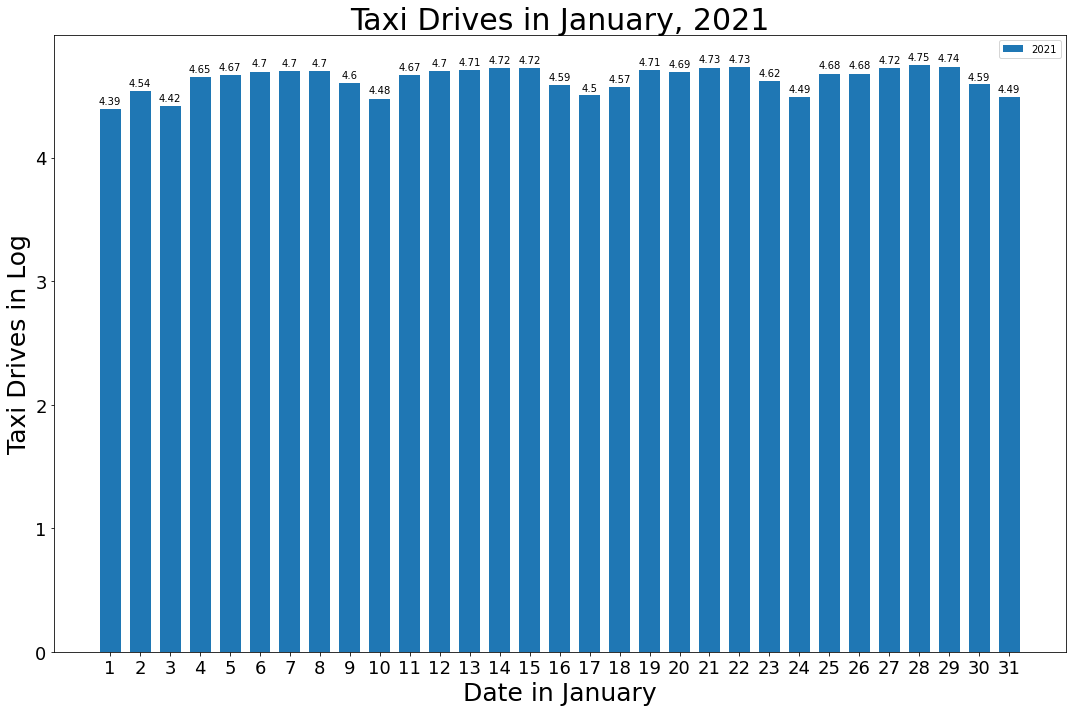

In [42]:
# I looked at the tutorial for reference and hints of this graph
# https://www.tutorialspoint.com/python-matplotlib-multiple-bars
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

labels = data_grouped['date']
# record_2019 = record_2019_df.values
# record_2020 = record_2020_df.values
record_2021 = record_2021_df.values

x = np.arange(len(labels))
width = 0.7

fig, ax = plt.subplots()
# rects_2019 = ax.bar(x  - width, record_2019, width, label = "2019")
# rects_2020 = ax.bar(x, record_2020, width, label = "2020")
rects_2021 = ax.bar(x, record_2021, width, label = "2021")

ax.set_xlabel("Date in January")
ax.set_ylabel('Taxi Drives in Log')
ax.set_title('Taxi Drives in January, 2021')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(), 2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
autolabel(rects_2021)

plt.show()

From the graph we can tell that there was much change in the taxi drive counts throughout the month. For the pattern, it almost looked like an sine wave in mathematics. We have some days with high trip counts and  some days with lower trip counts, which grouped into 8 different sections in the month.

## So, what is Yellow Taxi in NYC?

The TLC regulates medallion, street hail livery, commuter van, paratransit, and for-hire vehicles in New York City. The yellow taxi are the traditional type of taxi we imagine.
Interesting enough, according to the NYC State Law, yellow taxicabs were limited to 13,587 on the road. So we can tell that with this gigantic amount of taxi drives per day, we are interested in the amount of average trips for each taxi driver per day. We can do a little calculation for the year 2021.

In [43]:
avg_record_2021

3.252019838697806

The average trip for the 2021 taxi drivers were fairly low

## Digging a little deeper

### Total amount

Now, we had explored the trip, pay and passenger and the change in total record of trips in the 2021 year. We could also analyze the total revenue in the the yellow taxi drives for the 2021 year by building a bar graph graph.

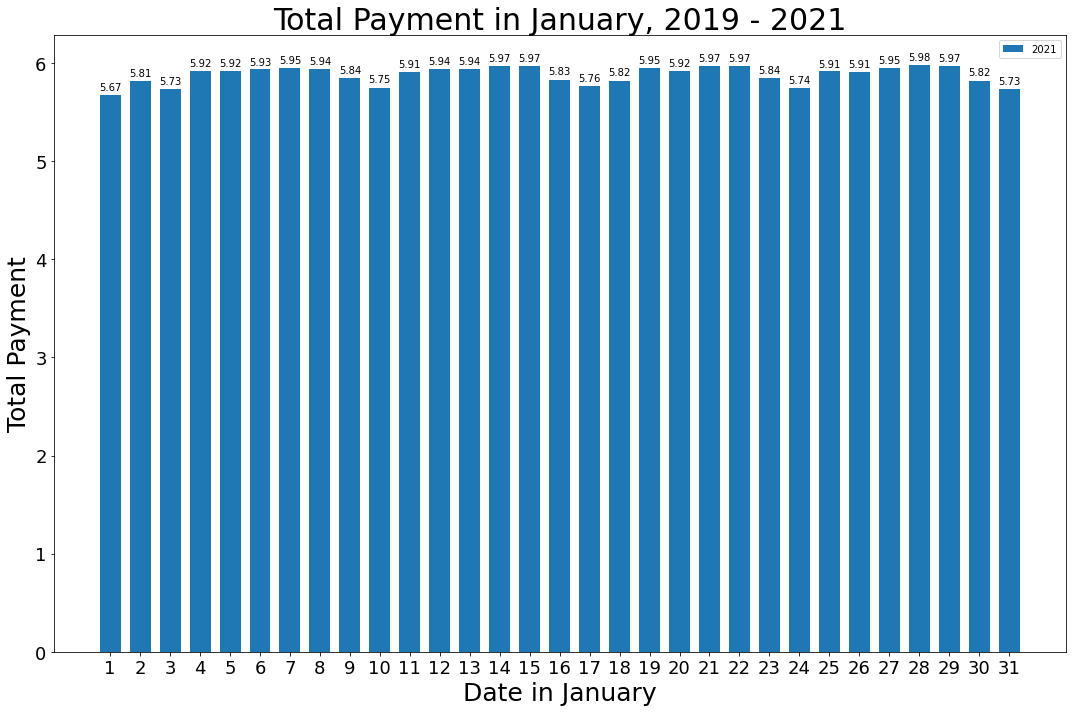

In [44]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

labels = data_grouped['date']
# record_2019 = total_amount_2019.values
# record_2020 = total_amount_2020.values
record_2021 = total_amount_2021.values

x = np.arange(len(labels))
width = 0.7

fig, ax = plt.subplots()
# rects_2019 = ax.bar(x  - width, record_2019, width, label = "2019")
# rects_2020 = ax.bar(x, record_2020, width, label = "2020")
rects_2021 = ax.bar(x, record_2021, width, label = "2021")

ax.set_xlabel("Date in January")
ax.set_ylabel('Total Payment')
ax.set_title('Total Payment in January, 2019 - 2021')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(), 2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects_2021)

plt.show()

## Passenger Count

The trips records across the year showed a significant change in the total amount and the average amount of trips in the month January. However, we have not inspect regarding the total amount of the market in January and the passenger count for each trip. We could make a bar  graph for us to achieve something like this. I will take the 2021 data value as the example.

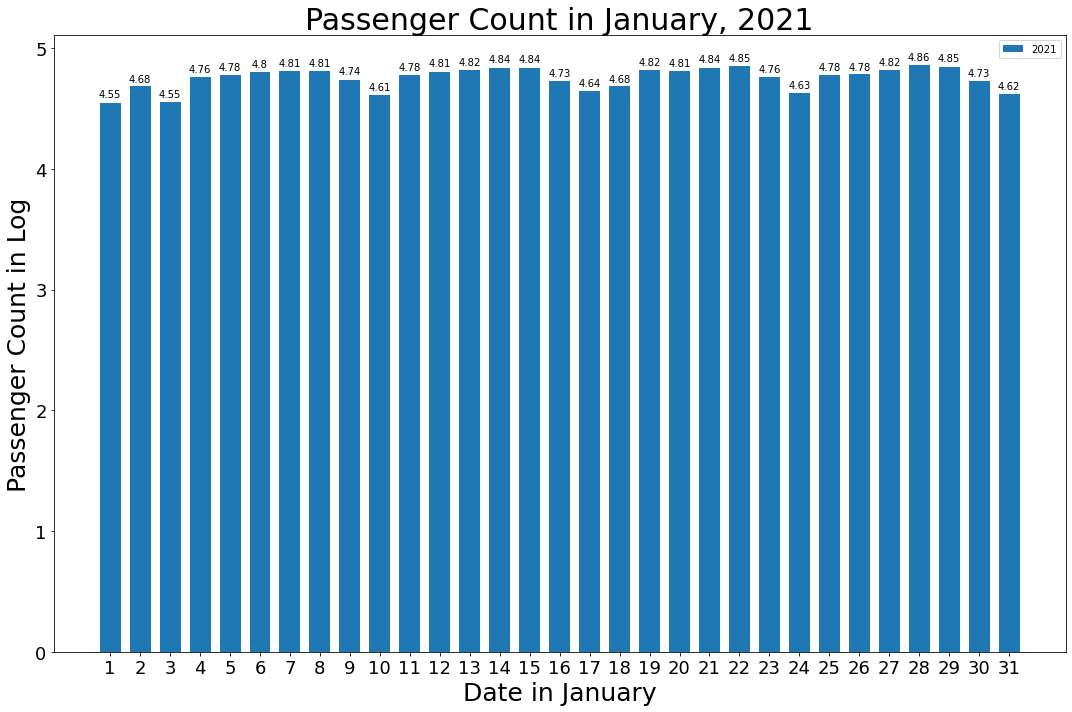

In [45]:
# I looked at the tutorial for reference and hints of this graph
# https://www.tutorialspoint.com/python-matplotlib-multiple-bars
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

labels = data_grouped['date']
# record_2019 = record_2019_df.values
# record_2020 = record_2020_df.values
record_2021 = np.log10(pass_count_2021)

x = np.arange(len(labels))
width = 0.7

fig, ax = plt.subplots()
# rects_2019 = ax.bar(x  - width, record_2019, width, label = "2019")
# rects_2020 = ax.bar(x, record_2020, width, label = "2020")
rects_2021 = ax.bar(x, record_2021, width, label = "2021")

ax.set_xlabel("Date in January")
ax.set_ylabel('Passenger Count in Log')
ax.set_title('Passenger Count in January, 2021')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(), 2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
autolabel(rects_2021)

plt.show()

From the three bar graphs above, we can tell that the relationship between the trip distance and the total amount is linear. However, the passenger count may flex for some distance and some payments.

Below is an interactive heatmap that shows the relationship between the variables that we indicated above. 

The trips records across the three years showed a significant change in the total amount and the average amount of trips in the month January. However, we have not inspect regarding the total amount of the market in January and the passenger count for each trip. We could make an interactive dashboard graph for us to achieve something like this. I will take the 2021 data value as the example.

In [46]:
myDashboard

## End of Part 3